In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('credit_card_transactions.csv')


In [35]:
data['name'] = data['first'] + " " +  data['last'] # создадим столбец name вместо двух столбцов first и last

In [36]:
# удалим столбцы Unnamed: 0, first,  last
# Unnamed: 0 - повторение индекса
# first и last - имя владельца считаю что ничего нам полезного не даст
# trans_num - номер транзакции уникальный, тоже ничего не даст
# unix_time - дублирует коглонку trans_date_trans_time
data = data.drop(['Unnamed: 0', 'trans_num', 'first', 'last', 'unix_time'], axis=1) # 'first', 'last'
# data.head(7)

In [37]:
# переведём столбец trans_date_trans_time в datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
# data['trans_date_trans_time'].info()

In [38]:
# разделим общую датувремя на год месяц день и отдельно время
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_time'] = data['trans_date_trans_time'].dt.time
data = data.drop('trans_date_trans_time', axis=1) # удалим столбец с датой

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   cc_num         1296675 non-null  int64  
 1   merchant       1296675 non-null  object 
 2   category       1296675 non-null  object 
 3   amt            1296675 non-null  float64
 4   gender         1296675 non-null  object 
 5   street         1296675 non-null  object 
 6   city           1296675 non-null  object 
 7   state          1296675 non-null  object 
 8   zip            1296675 non-null  int64  
 9   lat            1296675 non-null  float64
 10  long           1296675 non-null  float64
 11  city_pop       1296675 non-null  int64  
 12  job            1296675 non-null  object 
 13  dob            1296675 non-null  object 
 14  merch_lat      1296675 non-null  float64
 15  merch_long     1296675 non-null  float64
 16  is_fraud       1296675 non-null  int64  
 17  merch_zi

In [7]:
data.duplicated().sum() # полных дубликатов нет

0

In [40]:
# Подсчет повторений для каждого значения в столбце 'name'
count_series = data['name'].value_counts()

# Создание нового столбца с количеством повторений
data['name_count'] = data['name'].map(count_series)



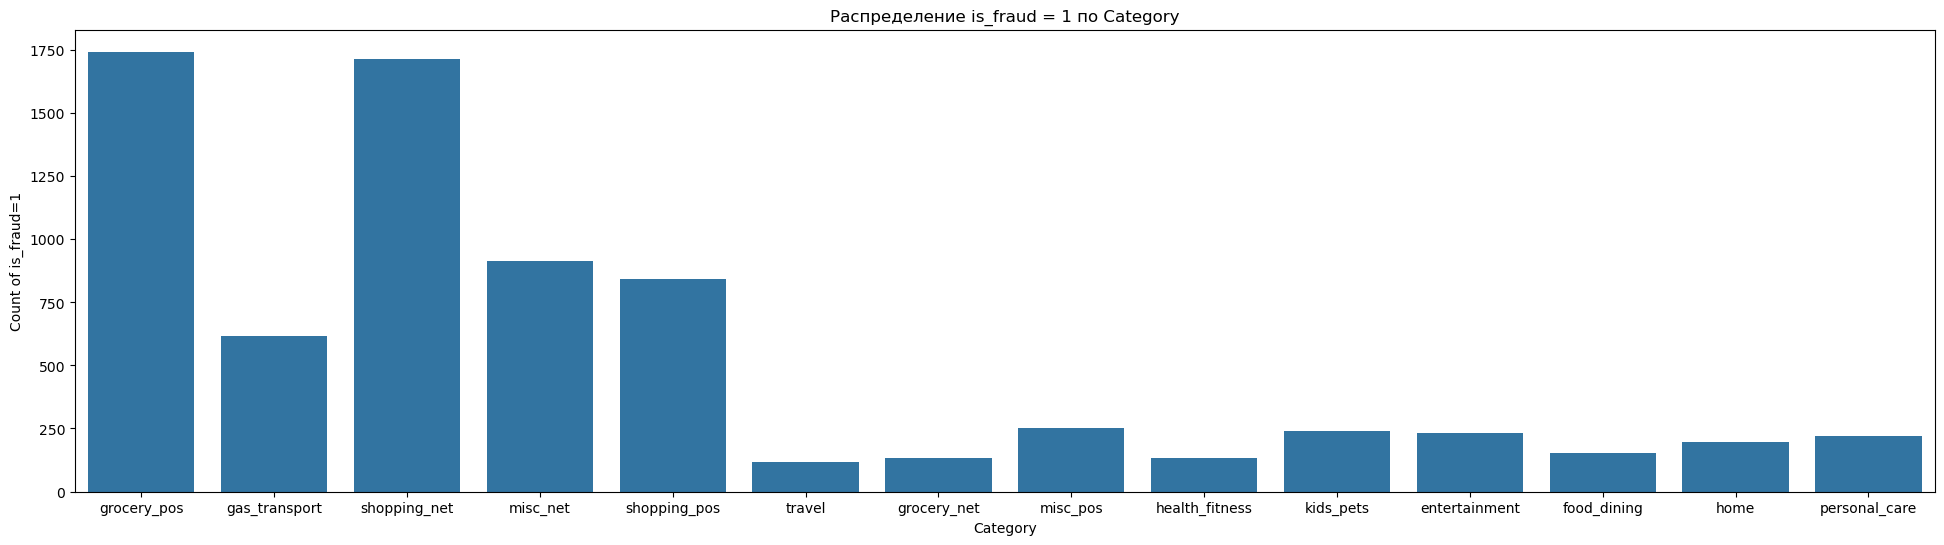

In [41]:
data['is_fraud'] = data['is_fraud'].astype(int)
    

# Фильтрация для получения только тех строк, где f равно 1
df_filtered = data.loc[data['is_fraud'] == 1, ]

# Построение графика распределения f по category
plt.figure(figsize=(24, 6))
sns.countplot(data=df_filtered, x='category')
plt.title('Распределение is_fraud = 1 по Category')
plt.xlabel('Category')
plt.ylabel('Count of is_fraud=1')
plt.show()

C:\Users\123\AppData\Local\Temp\ipykernel_10056\3620378459.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_distribution_df, x='category', y='percentage', palette='viridis')


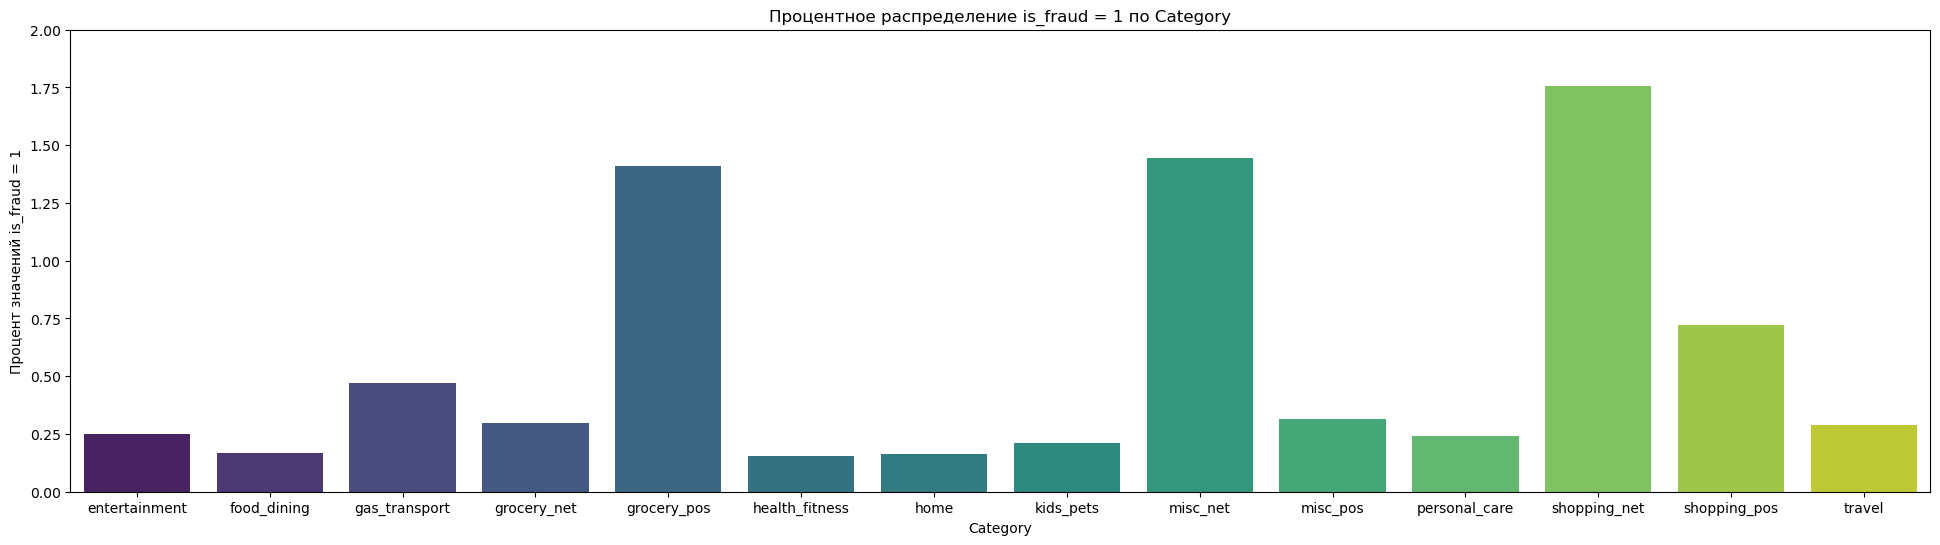

In [42]:

# Группировка по category и подсчет процентного соотношения значений f = 1
category_distribution = data.groupby('category')['is_fraud'].mean() * 100

# Преобразование в DataFrame для удобства построения графиков
category_distribution_df = category_distribution.reset_index()
category_distribution_df.columns = ['category', 'percentage']

# Построение графика
plt.figure(figsize=(24, 6))
sns.barplot(data=category_distribution_df, x='category', y='percentage', palette='viridis')
plt.title('Процентное распределение is_fraud = 1 по Category')
plt.xlabel('Category')
plt.ylabel('Процент значений is_fraud = 1')
plt.ylim(0, 2)
plt.show()

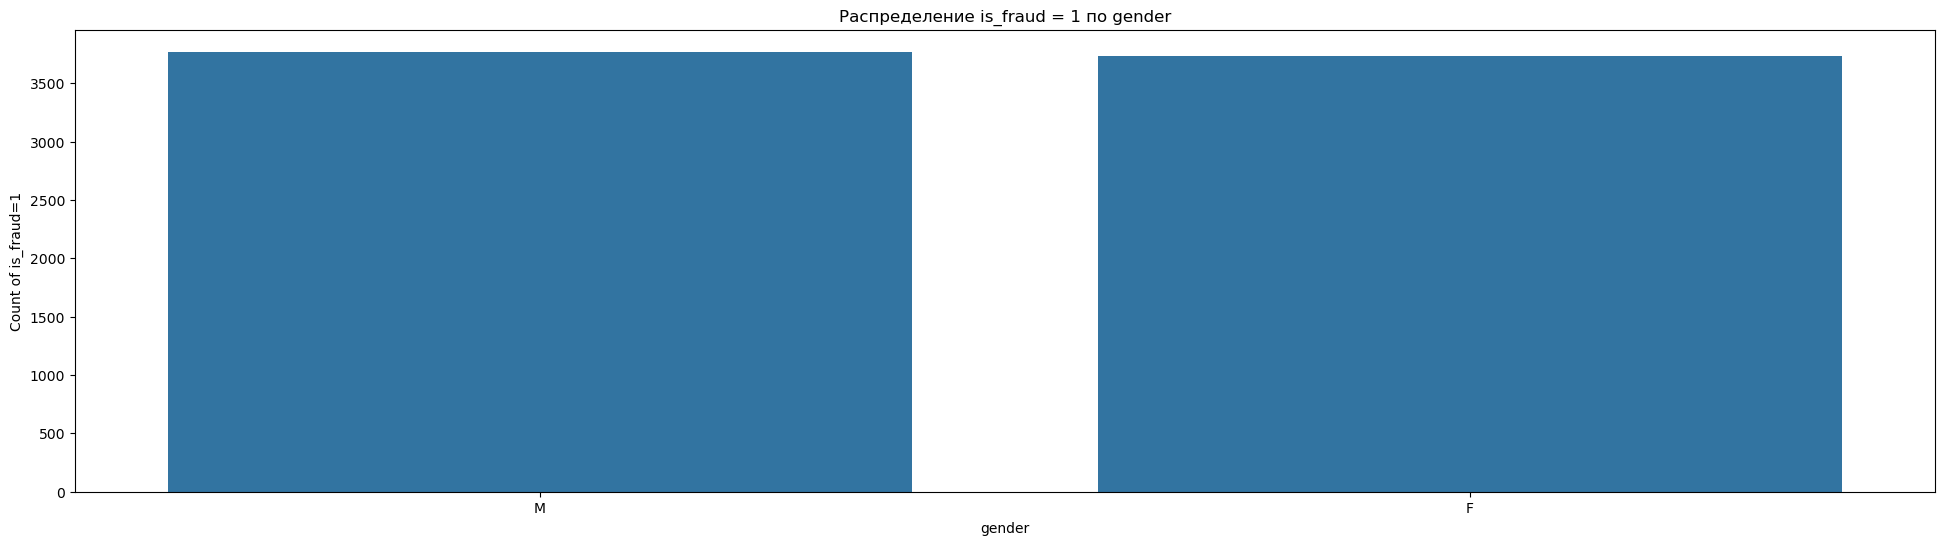

In [43]:
# Фильтрация для получения только тех строк, где f равно 1
df_filtered = data.loc[data['is_fraud'] == 1, ]

# Построение графика распределения f по category
plt.figure(figsize=(24, 6))
sns.countplot(data=df_filtered, x='gender')
plt.title('Распределение is_fraud = 1 по gender')
plt.xlabel('gender')
plt.ylabel('Count of is_fraud=1')
plt.show()

C:\Users\123\AppData\Local\Temp\ipykernel_10056\2779514267.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_distribution_df, x='gender', y='percentage', palette='viridis')


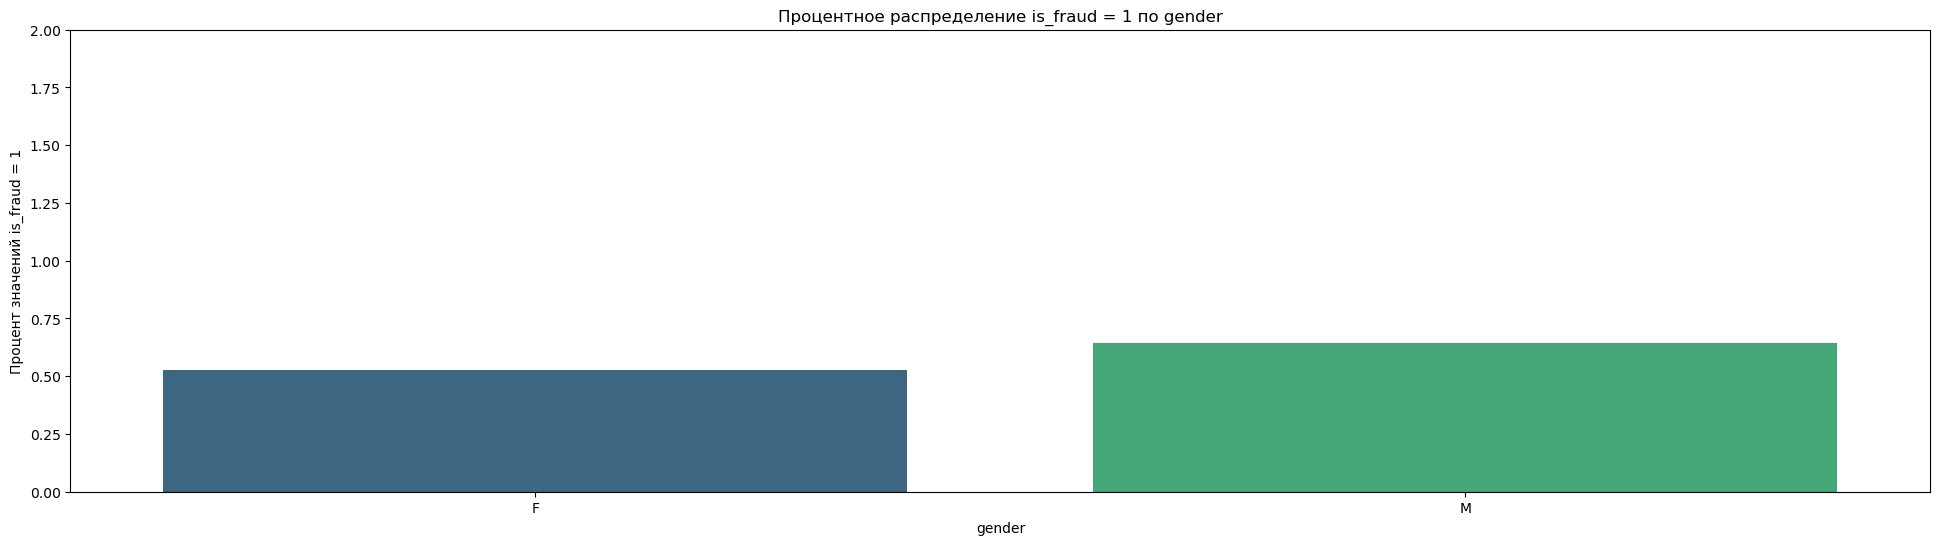

In [44]:
# Группировка по category и подсчет процентного соотношения значений f = 1
category_distribution = data.groupby('gender')['is_fraud'].mean() * 100

# Преобразование в DataFrame для удобства построения графиков
category_distribution_df = category_distribution.reset_index()
category_distribution_df.columns = ['gender', 'percentage']

# Построение графика
plt.figure(figsize=(24, 6))
sns.barplot(data=category_distribution_df, x='gender', y='percentage', palette='viridis')
plt.title('Процентное распределение is_fraud = 1 по gender')
plt.xlabel('gender')
plt.ylabel('Процент значений is_fraud = 1')
plt.ylim(0, 2)
plt.show()

C:\Users\123\AppData\Local\Temp\ipykernel_10056\3885285937.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_distribution_df, x='hour', y='percentage', palette='viridis')


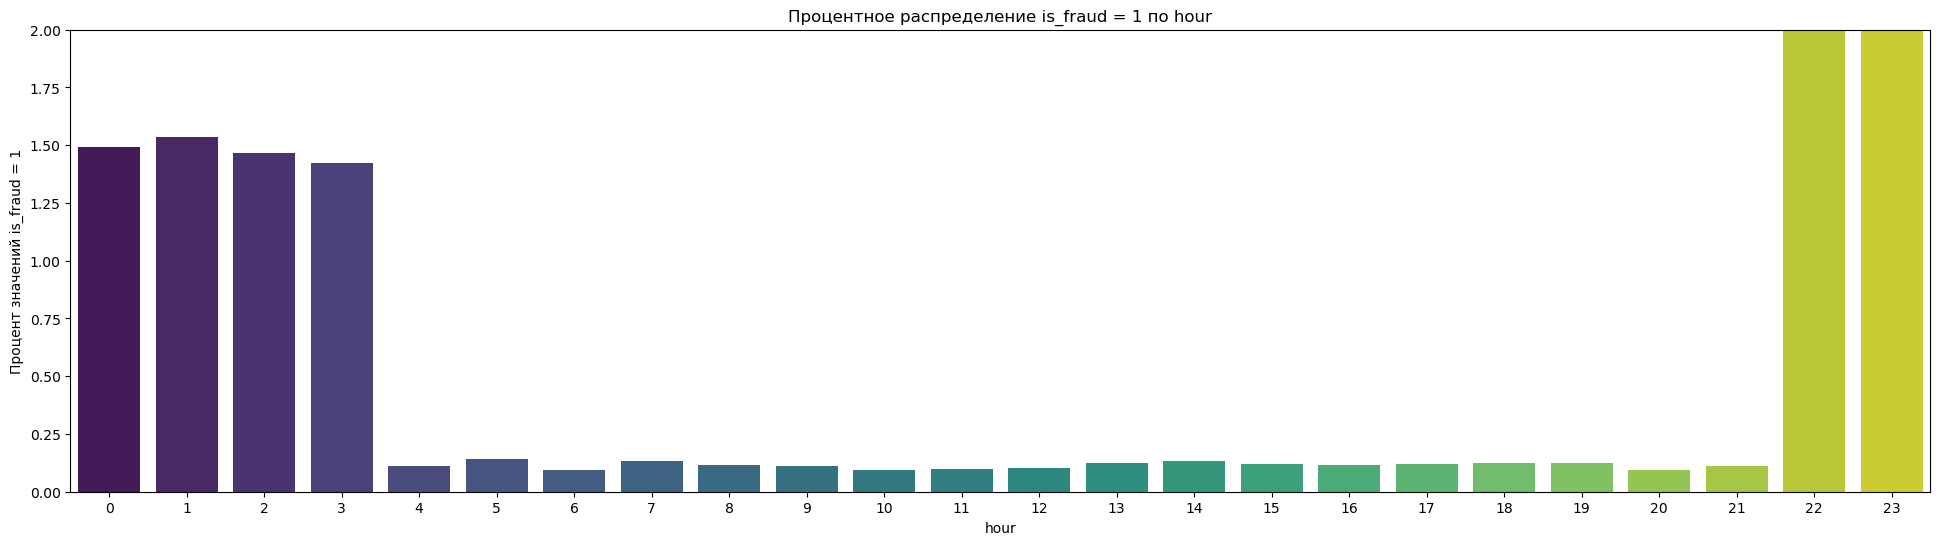

In [45]:
data['trans_time']
data['hour'] = data['trans_time'].apply(lambda x: x.hour)

category_distribution = data.groupby('hour')['is_fraud'].mean() * 100

# Преобразование в DataFrame для удобства построения графиков
category_distribution_df = category_distribution.reset_index()
category_distribution_df.columns = ['hour', 'percentage']

# Построение графика
plt.figure(figsize=(24, 6))
sns.barplot(data=category_distribution_df, x='hour', y='percentage', palette='viridis')
plt.title('Процентное распределение is_fraud = 1 по hour')
plt.xlabel('hour')
plt.ylabel('Процент значений is_fraud = 1')
plt.ylim(0, 2)
plt.show()

C:\Users\123\AppData\Local\Temp\ipykernel_10056\130944783.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_distribution_df, x='trans_month', y='percentage', palette='viridis')


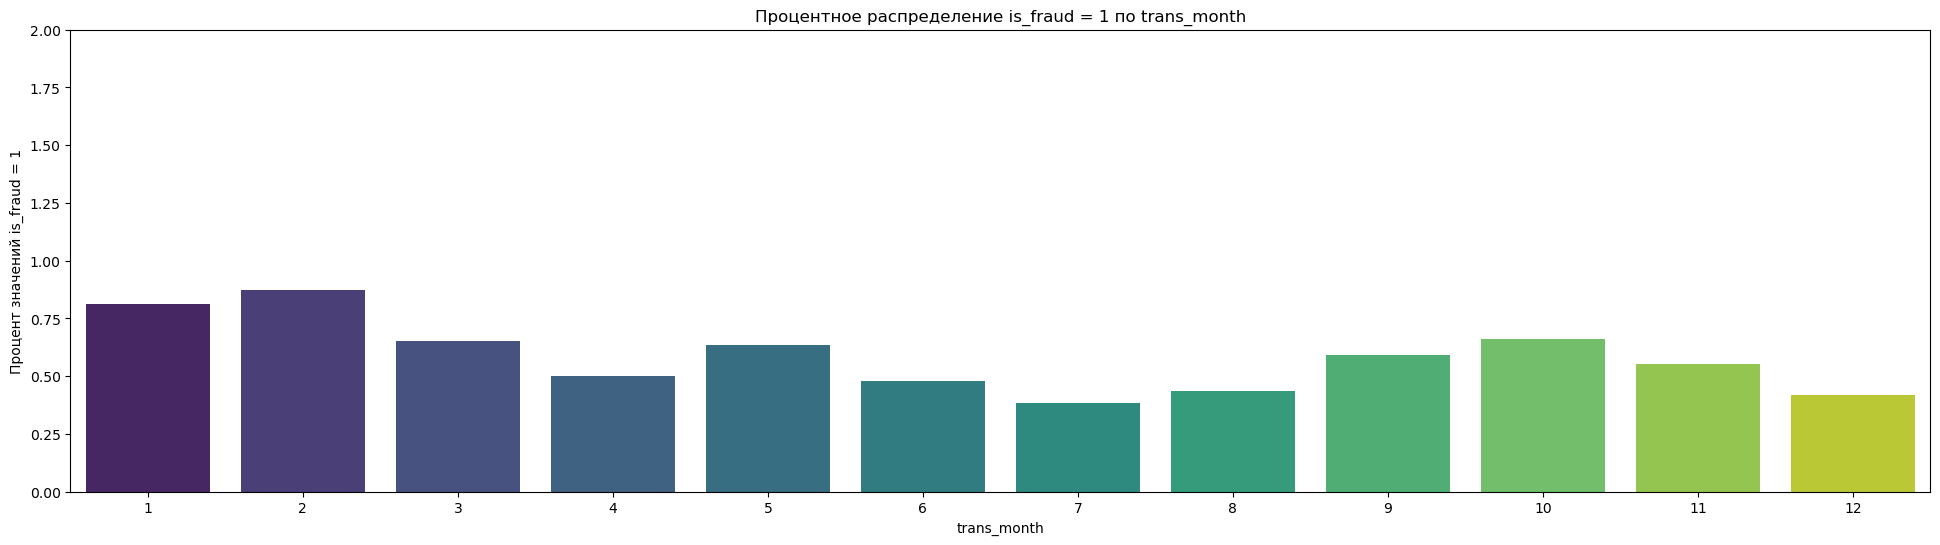

In [46]:

category_distribution = data.groupby('trans_month')['is_fraud'].mean() * 100

# Преобразование в DataFrame для удобства построения графиков
category_distribution_df = category_distribution.reset_index()
category_distribution_df.columns = ['trans_month', 'percentage']

# Построение графика
plt.figure(figsize=(24, 6))
sns.barplot(data=category_distribution_df, x='trans_month', y='percentage', palette='viridis')
plt.title('Процентное распределение is_fraud = 1 по trans_month')
plt.xlabel('trans_month')
plt.ylabel('Процент значений is_fraud = 1')
plt.ylim(0, 2)
plt.show()

# Часть с CTGAN

In [63]:
import pandas as pd
from ctgan import CTGAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse as sp
df=data

df=df.dropna()
df=df.drop('dob', axis=1)
df=df.drop('trans_time', axis=1)


df_fraud = df[df['is_fraud'] == 1]
df_non_fraud = df[df['is_fraud'] == 0]

categorical_features = ['merchant', 'category', 'gender', 'street', 'city', 'state', 'job', 'name']

ctgan = CTGAN(epochs=20)
ctgan.fit(df_fraud, discrete_columns=categorical_features)




In [64]:
synthetic_samples = ctgan.sample(1000)

In [65]:

df_fraud_extended = pd.concat([df_fraud, synthetic_samples], ignore_index=True)


full_df = pd.concat([df_fraud_extended, df_non_fraud], ignore_index=True)


drop_cols = ['is_fraud']
X = full_df.drop(columns=drop_cols)
y = full_df['is_fraud']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [66]:

encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
X_train_cat_enc = encoder.fit_transform(X_train[categorical_features])

In [67]:

X_test_cat_enc = encoder.transform(X_test[categorical_features])

In [ ]:

X_train_num = X_train.drop(columns=categorical_features)
X_test_num = X_test.drop(columns=categorical_features)


X_train_final = sp.hstack([X_train_num, X_train_cat_enc])
X_test_final = sp.hstack([X_test_num, X_test_cat_enc])

In [69]:

clf = RandomForestClassifier(n_estimators=20, random_state=42)
clf.fit(X_train_final, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [70]:
# Предсказания и отчёт
y_pred = clf.predict(X_test_final)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    218868
           1       0.98      0.67      0.79      1473

    accuracy                           1.00    220341
   macro avg       0.99      0.83      0.90    220341
weighted avg       1.00      1.00      1.00    220341



In [72]:
np.mean(y_pred==y_test)

0.9976854058028238